<a href="https://colab.research.google.com/github/woojinhong03/My_study_in_2022_python/blob/main/spaceship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

data = pd.read_csv("/content/drive/MyDrive/Kaggle Study/spaceship/train.csv")
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


* PassengerId - 각 승객의 고유 ID (gggg_pp - gggg:그룹, pp:그룹 내 번호) 
* HomePlanet - 승객이 출발한 행성 (일반적으로 거주하는 행성)
* Cryosleep - 극저온 수면 선택 여부
* Cabin - 객실 번호 (좌현 P, 우현 S)
* Destination - 승객이 내릴 행성
* Age - 승객의 나이
* VIP - 항해중 특별 서비스를 주문했는지 여부
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - 편의시설 청구 금액
* Name - 승객의 성과 이름
* Transported - 예측값, 승객이 다른 차원으로 운송되었는지 여부

In [34]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [35]:
data = data.dropna(axis=0)
data.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

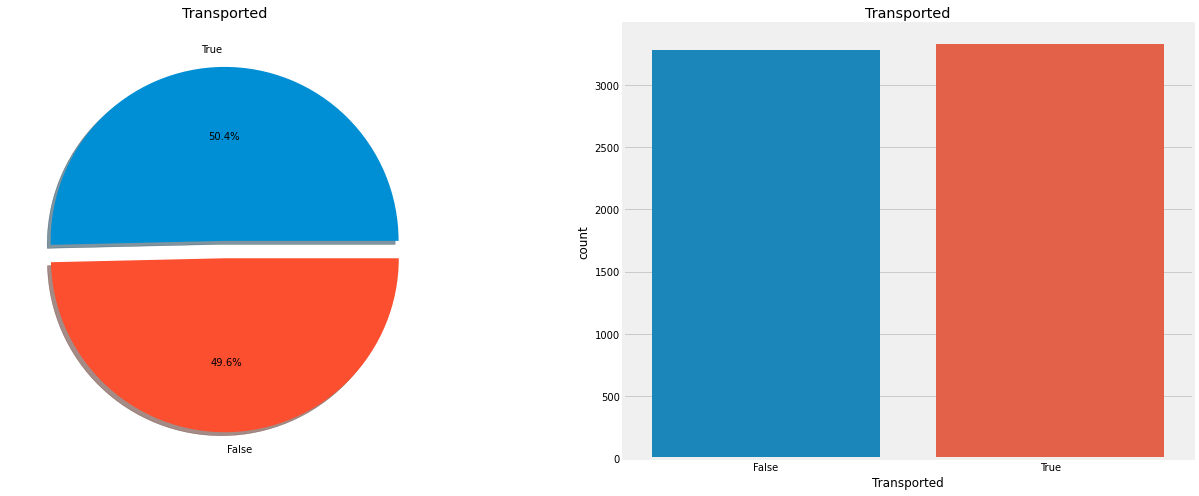

In [36]:
f,ax = plt.subplots(1,2,figsize=(20,8))
data['Transported'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Transported')
ax[0].set_ylabel('')
#print(ax[1])
sns.countplot('Transported',data=data,ax=ax[1])
ax[1].set_title('Transported')
plt.show()

In [37]:
data2 = pd.DataFrame(data.PassengerId.str.split('_',1).tolist(), columns = ['GroupId','NumId'])
data = pd.concat([data, data2], axis=1)
data.drop(["PassengerId"], axis=1)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,NumId
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,NaN,NaN
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,NaN,NaN
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,NaN,NaN
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,NaN,NaN


In [38]:
data["CryoSleep"].replace([False,True],[0,1],inplace=True)
data["CryoSleep"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
8688    0.0
8689    1.0
8690    0.0
8691    0.0
8692    0.0
Name: CryoSleep, Length: 8213, dtype: float64

In [39]:
data["Transported"].replace([False,True],[0,1],inplace=True)
data["Transported"]

0       0.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
8688    0.0
8689    0.0
8690    1.0
8691    0.0
8692    1.0
Name: Transported, Length: 8213, dtype: float64

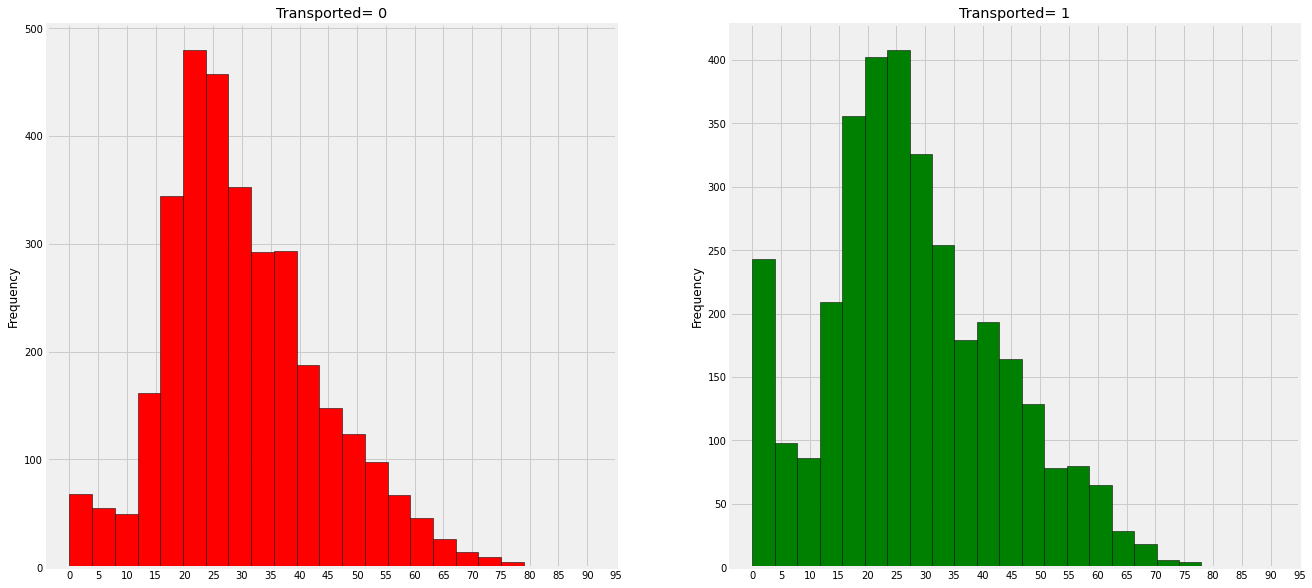

In [40]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Transported']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Transported= 0')
x1=list(range(0,100,5))
ax[0].set_xticks(x1)
data[data['Transported']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Transported= 1')
x2=list(range(0,100,5))
ax[1].set_xticks(x2)
plt.show()

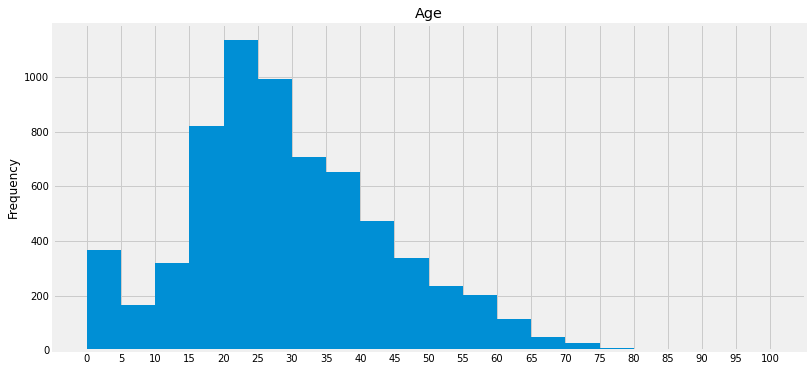

In [41]:
data["Age"].plot.hist(bins=range(0,101,5),figsize=[12,6])
plt.xticks(range(0,101,5))
plt.title("Age")
plt.show()

In [42]:
data['Age_band']=0
data.loc[data['Age']<=9,'Age_band']=0
data.loc[(data['Age']>9)&(data['Age']<=19),'Age_band']=1
data.loc[(data['Age']>19)&(data['Age']<=29),'Age_band']=2
data.loc[(data['Age']>29)&(data['Age']<=39),'Age_band']=3
data.loc[(data['Age']>39)&(data['Age']<=49),'Age_band']=4
data.loc[(data['Age']>49)&(data['Age']<=59),'Age_band']=5
data.loc[(data['Age']>59)&(data['Age']<=69),'Age_band']=6
data.loc[data['Age']>69,'Age_band']=7
data.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupId,NumId,Age_band
0,0001_01,Europa,0.0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0.0,0001,01,3
1,0002_01,Earth,0.0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1.0,0002,01,2


In [43]:
age0 = len(data[data['Age_band'] == 0])
age0

2139

In [44]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
0,2139
2,2131
3,1358
1,1138
4,812
5,438
6,161
7,36
